In [ ]:
from eval import play
from players.dqn import DQNPlayer
from players.minimax import MinimaxPlayer
from players.player import HumanPlayer
from utils import get_connect_four_game

game = get_connect_four_game()
input_shape = (3, 6, 7)  # [通道, 行, 列]
action_size = 7  # Connect4有7列可以下子
    
# player1 = DQNPlayer(input_shape, action_size, 'checkpoints/dqn_mcts_final.pt', 0)
# player2 = DQNPlayer(input_shape, action_size, 'checkpoints/dqn_mcts_episode_5000.pt', 1)
player1 = MinimaxPlayer(player_id=0, max_depth=6, game=game)
player2 = HumanPlayer(player_id=1)
play(player1, player2, visualize=True)


In [ ]:
from players.minimax import MinimaxPlayer
from eval import get_winrate_against_minimax
d2 = MinimaxPlayer(max_depth=1)
get_winrate_against_minimax(d2, depth=1, num_games=4)


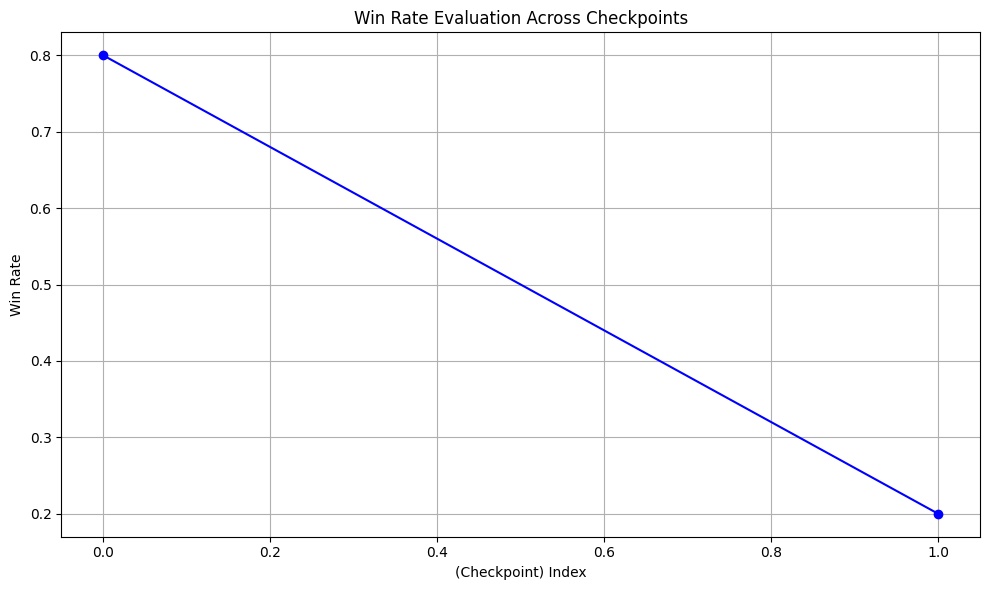

In [1]:
from eval import plot_win_rates


plot_win_rates([.8, .2])

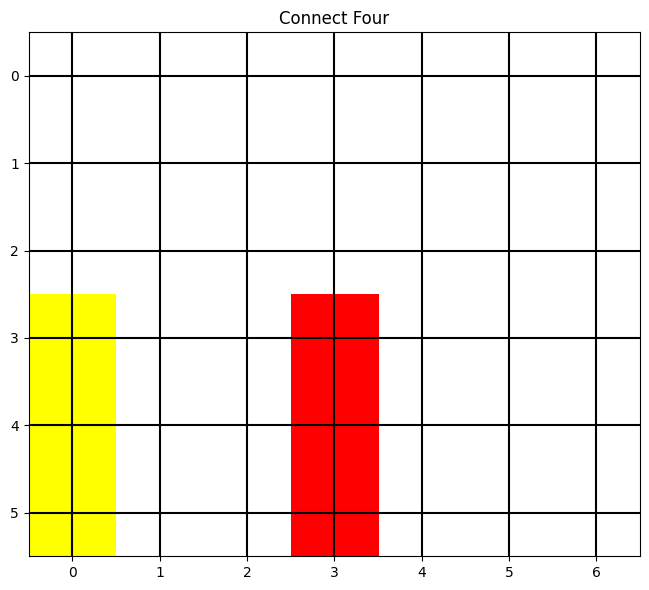

[[0.14014056 0.14916901 0.1732459  0.16333805 0.18050867 0.17669412
  0.15393266]]


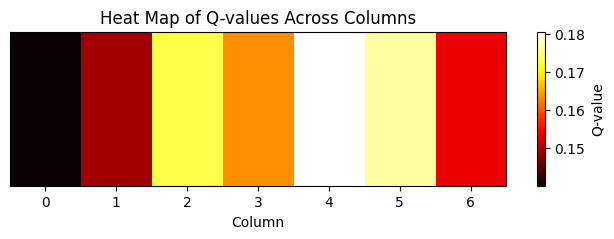

In [1]:
from dqn import DQNAgent
from utils import plot_q_values_heatmap, get_connect_four_game, progress_to_state, visualize_board
import torch
import numpy as np

dqn = DQNAgent((3,6,7), 7)
dqn.load('checkpoints/final_mcts_dqn_model.pth')

# state = progress_to_state(get_connect_four_game(), [0,3,0,3,0])
state = progress_to_state(get_connect_four_game(), [3,0,3,0,3,0])
visualize_board(state)
obs = np.array(state.observation_tensor(state.current_player()))
state = obs.reshape(3, 6, 7)
state_tensor = torch.FloatTensor(state).unsqueeze(0).to('cpu')
q_values = dqn.policy_net(state_tensor).detach().numpy()
print(q_values)
plot_q_values_heatmap(q_values)